In [1]:
# if change anything in ssp, restart kernel for re-loading
import os
from PIL import Image
import numpy as np
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import seg_helper as segh

In [2]:
def LoadDir(dirname):
    imgs = []
    for imgname in os.listdir(dirname):
        img = Image.open(os.path.join(dirname, imgname))        
        imgs.append(img)
    return np.array(imgs)

In [3]:
dirname = (''.join(['./Dataset/test_data/']))
image_list = []
image_name = []
name_image_dict = {}
for imgname in os.listdir(dirname):    
    file_path_name = ''.join(['./Dataset/test_data/',imgname])
    if os.path.isfile(file_path_name):
        image = imread(file_path_name)
        image_list.append(image)
        image_name.append(imgname)
        name_image_dict[imgname] = image

In [4]:
# define parameter
largeness, gauss_sigma, br = 500, 0.5, 0.1   # br is used for identifying background 
spatial_radius, range_radius, min_density = 5, 10, 50
num_iter = 10
safe_zone_len, num_points = 3, -1 # for both growcut and random walk, -1 for non sampling
window_size = 4  #for growcut
beta = 130       #for random walk

Fel_para = ('Fel', largeness, gauss_sigma, br)
MeanShift_para = ('MeanShift', spatial_radius, range_radius, min_density, br) 
GrabCut_para = ('GrabCut',num_iter)
GrowCut_para = ('GrowCut', safe_zone_len, window_size, num_points)
RandomWalk_para = ('RandomWalk', safe_zone_len, beta, num_points)

1.jpg


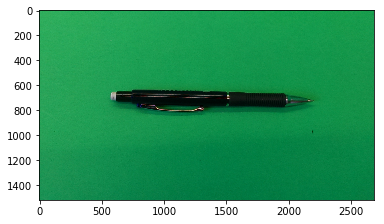

size  (456, 806)  MeanShift processing time  2.139693260192871


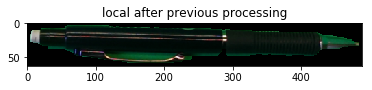

size  (456, 806)  GrabCut processing time  1.7052431106567383


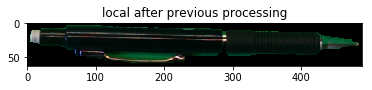

10
20
30
40


KeyboardInterrupt: 

In [5]:
k = 0
time_list = []
image_dim_list = []
for image in image_list:
    print(image_name[k])
    m,n,_ = image.shape
    samp_ratio = 1
    if m>600 or n>600:
        samp_ratio = 0.5
    
    # Define processing flow
    process_info = [0.3,MeanShift_para,1,GrabCut_para,1,GrowCut_para]

    input_mask = segh.seg_image(image, process_info)            
    print('output mask shape ', input_mask.shape, ' input shape ', (m,n))    
    k += 1